# DS-SF-27 | Lab 15 | Introduction to Time Series | Answer Key

In [3]:
import os
import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from statsmodels.tsa import arima_model
from statsmodels.graphics.tsaplots import plot_acf
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Walmart Sales Data

In this lab, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:
- Store - the store number
- Deptartment - the department number
- Date - the week
- WeeklySales - sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

> ## Question 0.  Load the data and set the date as index

In [4]:
df = pd.read_csv(os.path.join('..', 'datasets', 'walmart.csv'))

df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)

df.head()

,Store,Department,WeeklySales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


> ## Question 1.  Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [5]:
df = df[df.Store == 1][ ['WeeklySales'] ].resample('W').sum()

df.head()

,WeeklySales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


> ## Question 2.  Plot the rolling mean for `WeeklySales`.  What general trends do you observe?

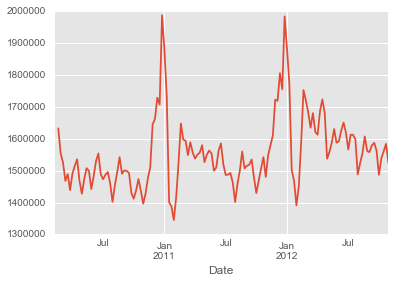

In [6]:
df.WeeklySales.rolling(window = 3).mean().plot()

> ## Question 3.  Compute the week 1, 2, and 52 autocorrelations for `WeeklySales` and/or create an autocorrelation plot.  Comments?

In [7]:
print 'Autocorrelation  1 =', df.WeeklySales.autocorr(1)
print 'Autocorrelation  2 =', df.WeeklySales.autocorr(2)
print 'Autocorrelation 52 =', df.WeeklySales.autocorr(52)

Autocorrelation  1 = 0.302158279411
Autocorrelation  2 = 0.127413130554
Autocorrelation 52 = 0.895376029478


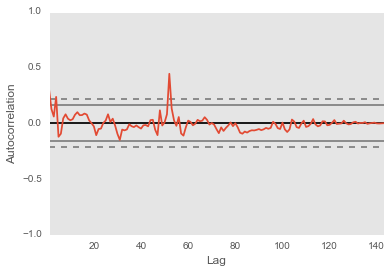

In [8]:
pd.tools.plotting.autocorrelation_plot(df.WeeklySales)

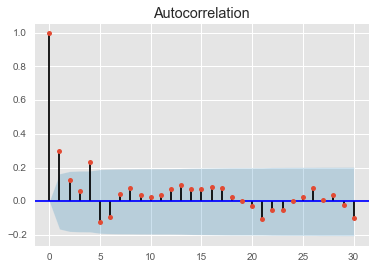

In [9]:
plot_acf(df.WeeklySales, lags = 30)

pass

Answer:

- Components 1 and 2 seem particularly useful for autoregression, perhaps up to 4
- In the plot above notice, spike at around 52, implying a yearly pattern as well
- No random spikes, probably not much use for a moving average model

> ## Question 4.  Split the weekly sales data in a training and test set, using 75% of the data for training.

In [10]:
df.describe

<bound method DataFrame.describe of             WeeklySales
Date                   
2010-02-07   1643690.90
2010-02-14   1641957.44
2010-02-21   1611968.17
2010-02-28   1409727.59
2010-03-07   1554806.68
...                 ...
2012-09-30   1437059.26
2012-10-07   1670785.97
2012-10-14   1573072.81
2012-10-21   1508068.77
2012-10-28   1493659.74

[143 rows x 1 columns]>

In [11]:
n = df.WeeklySales.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

In [12]:
df.head()

,WeeklySales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


In [13]:
df.WeeklySales.shape[0]

143

In [14]:
list_test = [1,2,3,5,8,0,4,7,0]


In [15]:
list_test[0]

1

In [16]:
list_test[:5]

[1, 2, 3, 5, 8]

In [17]:
df[:5]

,WeeklySales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


In [18]:
df.head()

,WeeklySales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


> ## Question 5.  Create an `AR(1)` model on the training data and compute the mean absolute error of the predictions.

In [19]:
model = arima_model.ARIMA(train_df, (1, 1, 0)).fit()

test_hat_df = model.predict(
    test_df.index[0].strftime('%Y-%m-%d'),
    test_df.index[-1].strftime('%Y-%m-%d'),
    dynamic = True
)

print 'Mean absolute error =', metrics.mean_absolute_error(test_df, test_hat_df)

model.summary()

Mean absolute error = 1587894.35326


//anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.WeeklySales   No. Observations:                  106
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1434.780
Method:                       css-mle   S.D. of innovations         182768.238
Date:                Mon, 14 Nov 2016   AIC                           2875.560
Time:                        22:21:36   BIC                           2883.550
Sample:                    02-14-2010   HQIC                          2878.798
                         - 02-19-2012                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                1662.0670   1.29e+04      0.129      0.898     -2.36e+04  2.69e+04
ar.L1.D.WeeklySales    -0.3823      0.089     -4.293      0.000        -0.557    -0.208
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.6156           +0.0000j            2.6156            0.5000
-----------------------------------------------------------------------------
"""

> ## Question 6.  Plot the residuals.  Where are their significant errors?

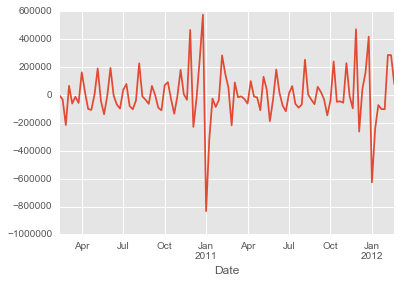

In [20]:
model.resid.plot()

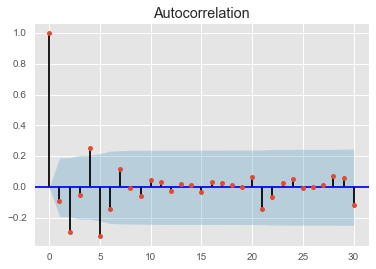

In [21]:
plot_acf(model.resid, lags = 30)

pass

> ## Question 7.  Compute an `AR(2)` model and an `ARMA(2, 2)` model - does this improve your mean absolute error on the held out set?

In [22]:
model = arima_model.ARIMA(train_df, (2, 0, 0)).fit()

test_hat_df = model.predict(
    test_df.index[0].strftime('%Y-%m-%d'),
    test_df.index[-1].strftime('%Y-%m-%d'),
    dynamic = True
)

print 'Mean absolute error =', metrics.mean_absolute_error(test_df, test_hat_df)

model.summary()

Mean absolute error = 81203.2343732


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            WeeklySales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Mon, 14 Nov 2016   AIC                           2876.963
Time:                        22:21:38   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              1.544e+06    2.4e+04     64.349      0.000       1.5e+06  1.59e+06
ar.L1.WeeklySales     0.2974      0.097      3.075      0.003         0.108     0.487
ar.L2.WeeklySales     0.0589      0.098      0.603      0.548        -0.132     0.250
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3080           +0.0000j            2.3080            0.0000
AR.2           -7.3587           +0.0000j            7.3587            0.5000
-----------------------------------------------------------------------------
"""

> ## Question 8.  Finally, compute an `ARIMA` model to improve your prediction error.

In [23]:
model = arima_model.ARIMA(train_df, (2, 1, 3)).fit()

test_hat_df = model.predict(
    test_df.index[0].strftime('%Y-%m-%d'),
    test_df.index[-1].strftime('%Y-%m-%d'),
    dynamic = True
)

print 'Mean absolute error =', metrics.mean_absolute_error(test_df, test_hat_df)

model.summary()

Mean absolute error = 1595860.58034


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.WeeklySales   No. Observations:                  106
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1413.639
Method:                       css-mle   S.D. of innovations         142956.482
Date:                Mon, 14 Nov 2016   AIC                           2841.278
Time:                        22:21:40   BIC                           2859.922
Sample:                    02-14-2010   HQIC                          2848.835
                         - 02-19-2012                                         
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                 567.1013    622.237      0.911      0.364      -652.462  1786.664
ar.L1.D.WeeklySales    -1.0481      0.090    -11.598      0.000        -1.225    -0.871
ar.L2.D.WeeklySales    -0.4783      0.088     -5.446      0.000        -0.650    -0.306
ma.L1.D.WeeklySales     0.4695      0.141      3.320      0.001         0.192     0.747
ma.L2.D.WeeklySales    -0.4695      0.193     -2.427      0.017        -0.849    -0.090
ma.L3.D.WeeklySales    -0.9999      0.148     -6.766      0.000        -1.290    -0.710
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0957           -0.9435j            1.4459           -0.3869
AR.2           -1.0957           +0.9435j            1.4459            0.3869
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.7348           -0.6783j            1.0000           -0.3814
MA.3           -0.7348           +0.6783j            1.0000            0.3814
-----------------------------------------------------------------------------
"""